In [43]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_auc_score,roc_curve, accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('cleaned_data.csv')

In [44]:
def execute_fit_predict(classifier_model, X_train, y_train, X_test):
    classifier_model.fit(X_train, y_train)
    pred = classifier_model.predict(X_test)
    return pred

In [45]:
def execute_evaluate(y_test, pred=None, pred_proba=None):
    # get confusion matrix
    confusion = confusion_matrix( y_test, pred)
    # get accuracy score
    accuracy = accuracy_score(y_test , pred)
    # get precision
    precision = precision_score(y_test , pred)
    # get recall
    recall = recall_score(y_test , pred)
    # get f1 score
    f1 = f1_score(y_test,pred)
    # get auc score
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    result = {
        "roc_auc": [roc_auc.round(4)],
        "precision": [precision.round(4)],
        "recol": [recall.round(4)],
        "f1": [f1.round(4)],
        "accuracy": [accuracy.round(4)],
    }

    return (confusion,pd.DataFrame(result))


In [46]:
def execute_cross_validation(classifier_model, X_features, y_targets, folds):
    kfold = KFold(n_splits=folds)
    scores = []
    for i , (train_index, test_index) in enumerate(kfold.split(X_features)):
        # Create index pointing to training and validation data by cross-validation from the data
        X_train, X_test = X_features.values[train_index], X_features.values[test_index]
        y_train, y_test = y_targets.values[train_index], y_targets.values[test_index]
        
        # train and fit
        pred = execute_fit_predict(classifier_model=classifier_model, X_train=X_train, y_train=y_train, X_test=X_test)
        pred_proba = classifier_model.predict_proba(X_test)[:,1]
        score = execute_evaluate(y_test=y_test, pred=pred, pred_proba=pred_proba)
        scores.append({"index":i, "score":score })
    return sorted(scores, key=lambda x: x['score'][1]['roc_auc'].iloc[0], reverse=True)



In [47]:
def roc_curve_plot(y_test ,X_test, classifier_models=None, labels=[""], title=""):
    fig, _ = plt.subplots(constrained_layout=True, figsize=(4, 4))
    fig.suptitle(title, fontsize=12)
    for idx, classifier_model in enumerate(classifier_models):
        y_pred_proba = classifier_model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, 'o-', ms=1, label="{} auc={}".format(labels[idx],auc ))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend(loc=4)
    plt.title('ROC Curve')    
    plt.show()

In [48]:
def evaluate_heatmap(evaluation, fig_title=""):
    fig, axs = plt.subplots(figsize=(6, 3), ncols=2, constrained_layout=True )
    fig.suptitle(fig_title, fontsize=12)
    axs[1].title.set_text("Counfusion_Matrix")
    axs[0].title.set_text("SCORE")
    for i in enumerate(evaluation):
        sns.heatmap(evaluation[1], cmap="YlGnBu", annot=True, ax=axs[0], cbar=False)
        sns.heatmap(evaluation[0], annot=True, ax=axs[1], cbar=False)

# Decision Tree
## Without cross validation vs With cross validation

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


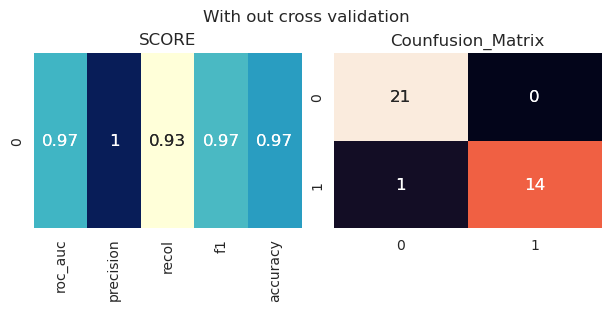

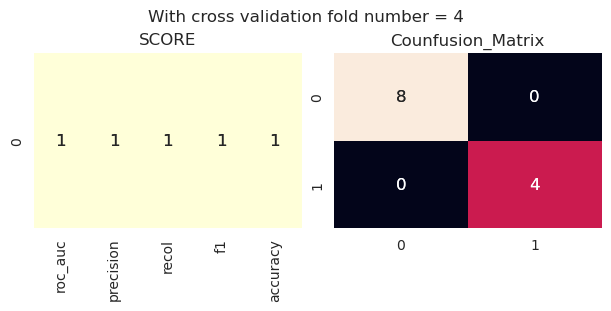

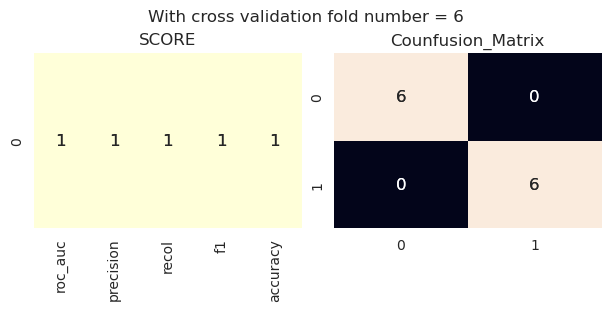

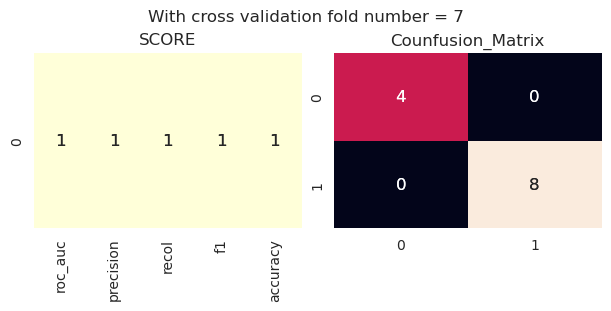

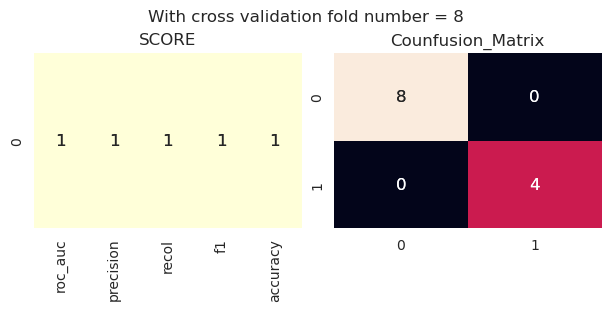

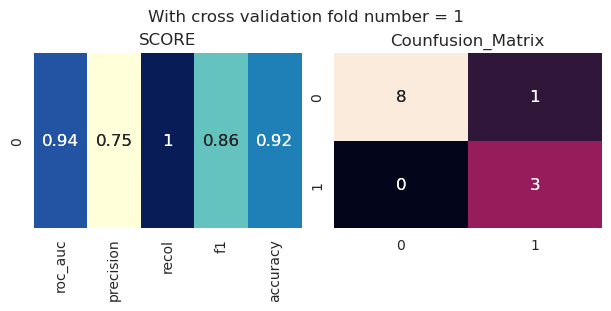

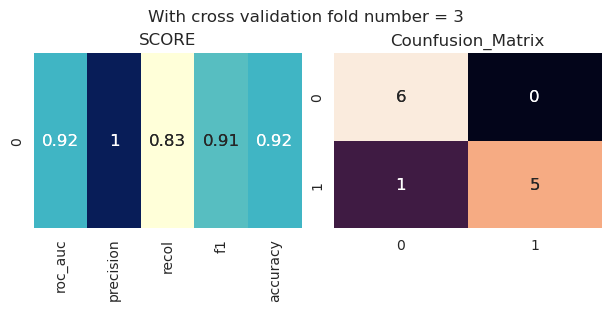

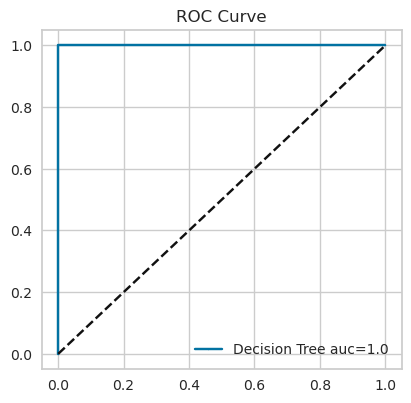

In [49]:
X_features = df.drop(['Fraud'], axis=1)
y_targets = df['Fraud']
X_train, X_test, y_train, y_test=train_test_split(X_features, y_targets, test_size=0.3)

decision_tree = DecisionTreeClassifier()
pred = execute_fit_predict(classifier_model=decision_tree, X_train=X_train, y_train=y_train, X_test=X_test)
pred_proba = decision_tree.predict_proba(X_test)[:,1]
evaluation = execute_evaluate(y_test=y_test,pred=pred,pred_proba=pred_proba)
evaluate_heatmap(evaluation=evaluation, fig_title="With out cross validation")
cross_validation_scores = execute_cross_validation(classifier_model=decision_tree, X_features=X_features, y_targets=y_targets, folds=10)

for idx, x in enumerate(cross_validation_scores):
    if(idx > 5):break
    evaluate_heatmap(x['score'], fig_title="With cross validation fold number = {}".format(x['index']))

roc_curve_plot(y_test=y_test, X_test=X_test, classifier_models=[decision_tree],labels=["Decision Tree"])

# cross_val_score_API = cross_val_score(decision_tree, X_features, y_targets, scoring = 'roc_auc', cv=10)
# print(cross_val_score_API)


# Random Forest
## Without cross validation vs With cross validation

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


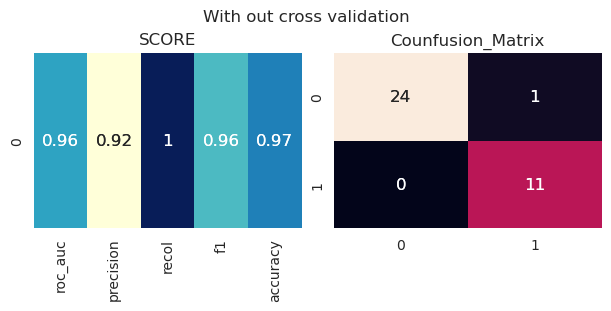

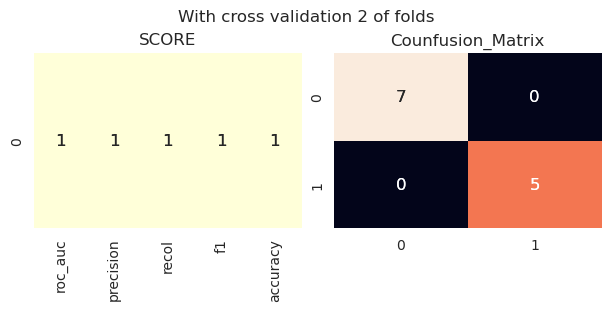

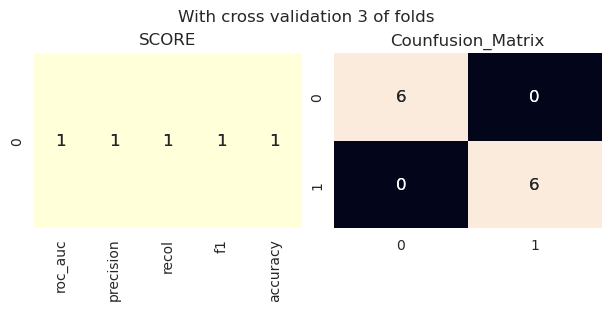

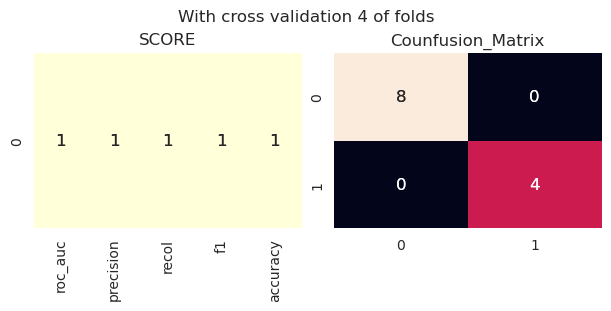

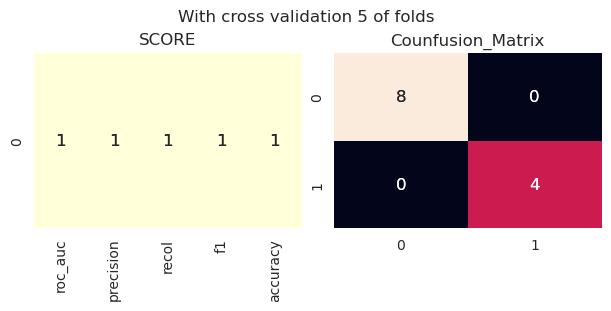

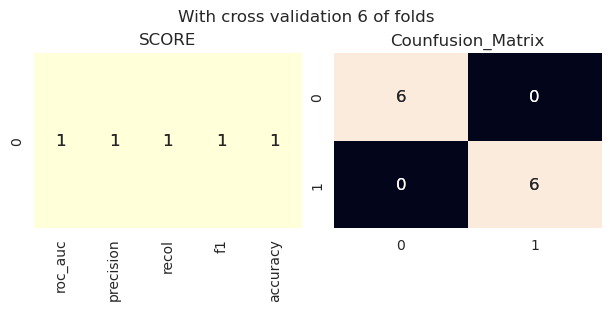

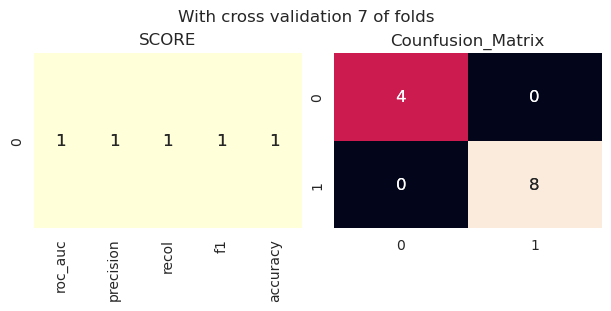

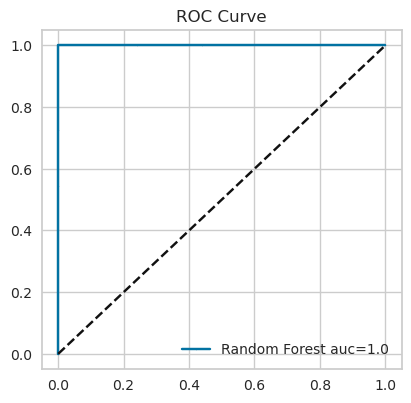

In [50]:
X_features = df.drop(['Fraud'], axis=1)
y_targets = df['Fraud']
X_train, X_test, y_train, y_test=train_test_split(X_features, y_targets, test_size=0.3)

random_forest = RandomForestClassifier()
pred = execute_fit_predict(classifier_model=random_forest, X_train=X_train, y_train=y_train, X_test=X_test)
pred_proba = random_forest.predict_proba(X_test)[:,1]
evaluation = execute_evaluate(y_test=y_test,pred=pred,pred_proba=pred_proba)
evaluate_heatmap(evaluation, fig_title="With out cross validation")
cross_validation_scores = execute_cross_validation(classifier_model=random_forest, X_features=X_features, y_targets=y_targets, folds=10)
for idx, x in enumerate(cross_validation_scores):
    if(idx > 5):break
    evaluate_heatmap(x['score'], fig_title="With cross validation {} of folds".format(x['index']))

roc_curve_plot(y_test=y_test, X_test=X_test, classifier_models=[random_forest],labels=["Random Forest"])



# Vusualise roc_curve

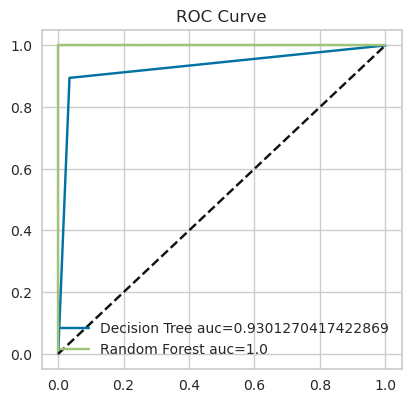

In [51]:
X_features = df.drop(['Fraud'], axis=1)
y_targets = df['Fraud']
X_train, X_test, y_train, y_test=train_test_split(X_features, y_targets, test_size=0.4)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

roc_curve_plot(y_test=y_test, X_test=X_test, classifier_models=[decision_tree, random_forest],labels=["Decision Tree","Random Forest"])



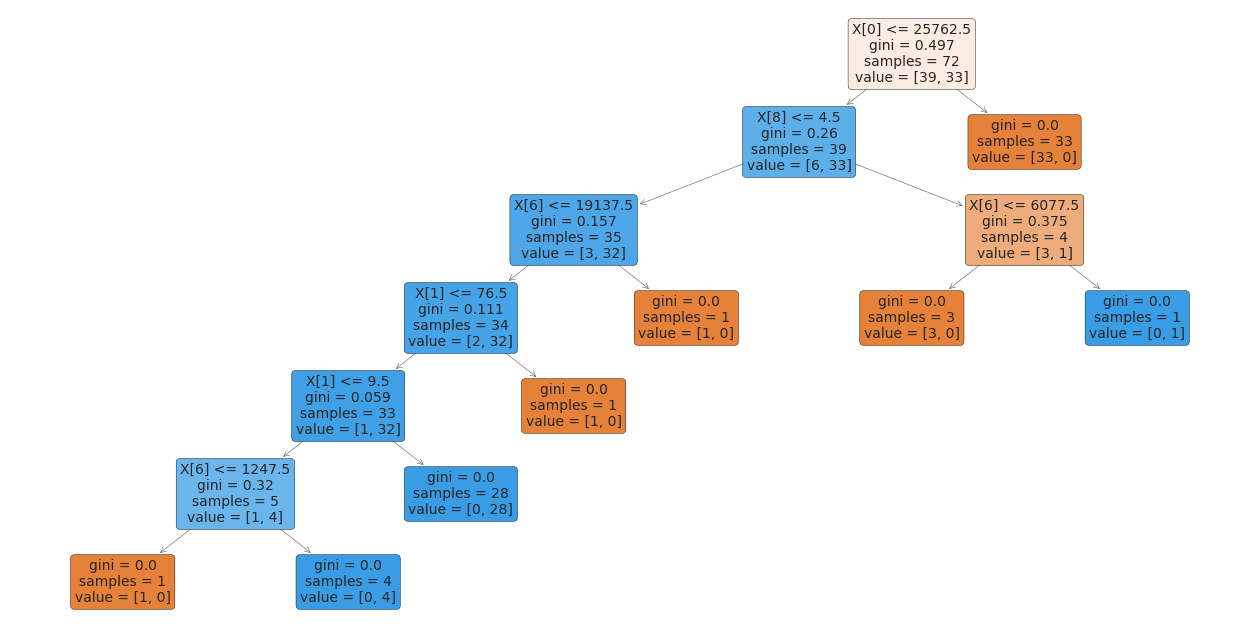

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


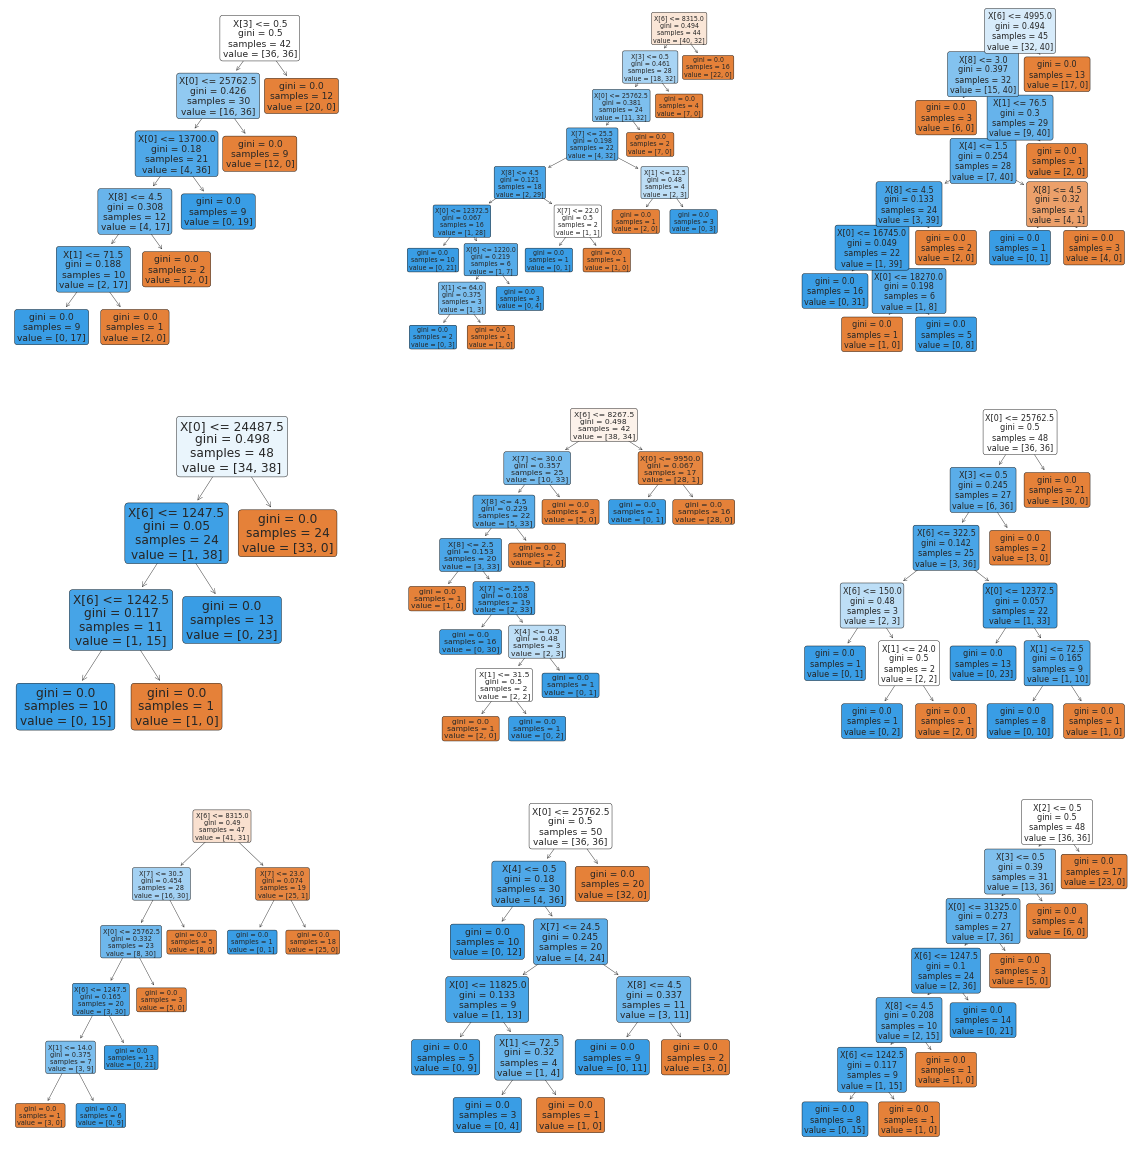

In [52]:
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(decision_tree, fontsize=10, filled=True, impurity=True,rounded=True)
plt.show()

fig, ax = plt.subplots(figsize=(12, 12), nrows=3, ncols=3)
fig.tight_layout()
for i, model in enumerate(random_forest.estimators_):
    if i > 8:break
    row = int(i/3)
    col = i%3
    plot_tree(random_forest.estimators_[i], filled=True, impurity=True,rounded=True, ax=ax[row][col])
plt.show()


Feature importances:
[0.716 0.061 0.    0.    0.    0.    0.135 0.    0.089]
Income :  0.716
Post-code :  0.061
Employed :  0.000
Home Owner :  0.000
Education :  0.000
Gender :  0.000
Balance :  0.135
Age :  0.000
Colour :  0.089


<AxesSubplot:>

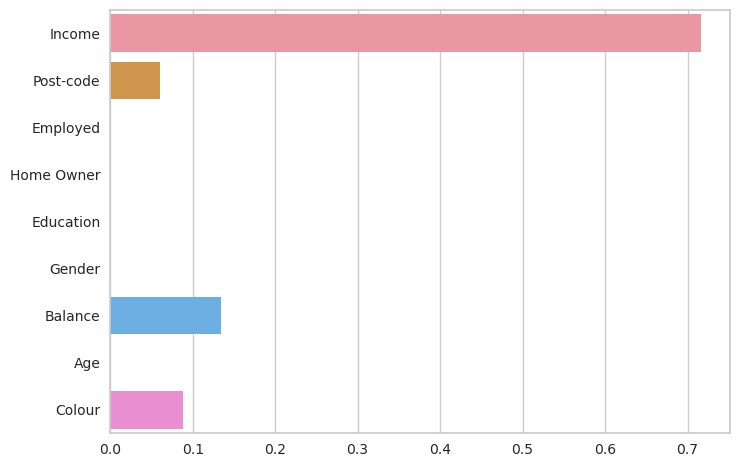

In [53]:
#decision tree feature inportance
print("Feature importances:\n{0}".format(np.round(decision_tree.feature_importances_,3)))
for name,value in zip(X_features.columns, decision_tree.feature_importances_):
    print("{0} : {1: .3f}".format(name, value))
sns.barplot(x=decision_tree.feature_importances_, y=X_features.columns)

Feature importances:
[0.388 0.065 0.072 0.094 0.028 0.004 0.134 0.085 0.13 ]
Income :  0.388
Post-code :  0.065
Employed :  0.072
Home Owner :  0.094
Education :  0.028
Gender :  0.004
Balance :  0.134
Age :  0.085
Colour :  0.130


<AxesSubplot:>

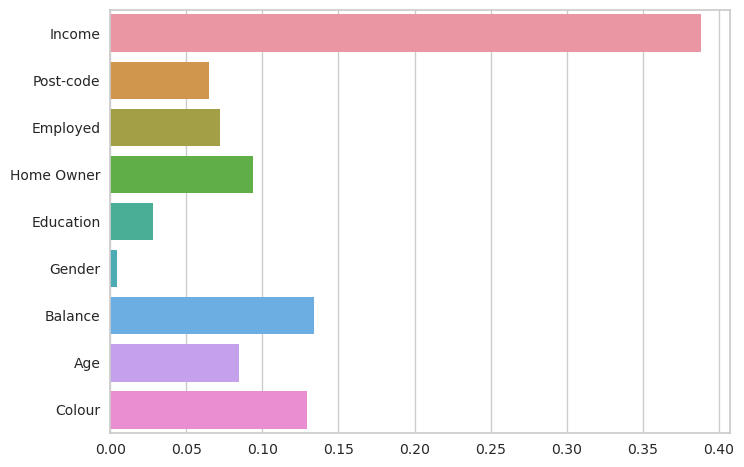

In [54]:
#random forest feature inportance
print("Feature importances:\n{0}".format(np.round(random_forest.feature_importances_,3)))
for name,value in zip(X_features.columns, random_forest.feature_importances_):
    print("{0} : {1: .3f}".format(name, value))
sns.barplot(x=random_forest.feature_importances_, y=X_features.columns)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3b0c4dc0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff584191f0>
Traceback 

Silhouette score: 0.6062687880028897
Accuracy: 0.3333333333333333


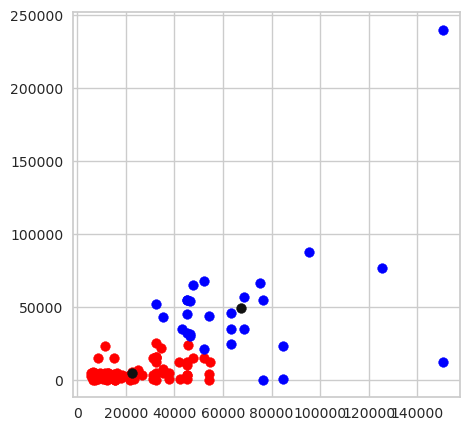

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Income','Balance']]
# X = df.drop(['Fraud'], axis=1)
# columns = X.columns
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X =pd.DataFrame(X, columns=columns)

# Create KMeans model
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=1000)
# kmeans = KMeans(n_clusters=2)

# Fit the model to the scaled data
kmeans.fit(X)
# # print(kmeans.labels_)
centroids = kmeans.cluster_centers_
# # print("centroids:", centroids[:,0])

# Make predictions on the scaled data
predictions = kmeans.predict(X)
# print("predictions:", predictions)

# Evaluate the model using some metrics
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score
silhouette = silhouette_score(X, predictions)
print("Silhouette score:", silhouette)

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[predictions==0]['Income'],X[predictions==0]['Balance'],c='red')
ax.scatter(X[predictions==1]['Income'],X[predictions==1]['Balance'],c='blue')
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', edgecolors='k', s=50)

# Evaluate the predictions
accuracy = sum(predictions == df['Fraud']) / len(df)
print('Accuracy:', accuracy)

# ax.scatter(X[predictions==0]['Income'],X[predictions==0]['Home Owner'],c='red')
# ax.scatter(X[predictions==1]['Income'],X[predictions==1]['Home Owner'],c='blue')


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3b054310>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


<bound method ScoreVisualizer.score of SilhouetteVisualizer(ax=<AxesSubplot:>,
                     estimator=KMeans(max_iter=1000, n_clusters=2))>

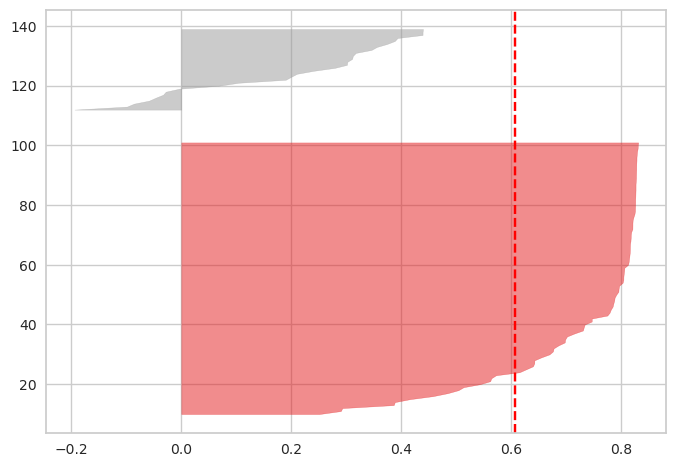

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer
visModel = SilhouetteVisualizer(kmeans)
visModel.fit(X)
visModel.score
